<a href="https://colab.research.google.com/github/Zabaluna/FinalStudentTask/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ИТОГОВАЯ АТТЕСТАЦИЯ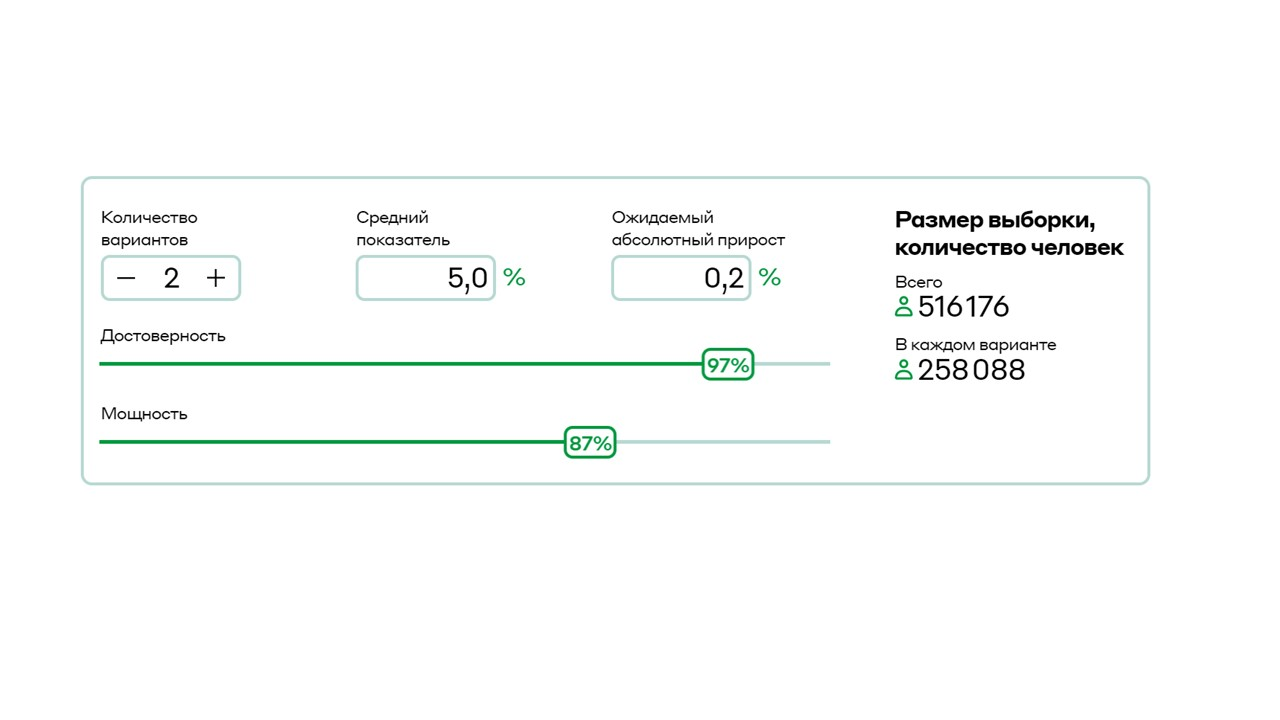

# КЕЙС 1
Ваш продукт - это школа английского языка Лендинг для языковой школы. Проанализируйте
конкурентов на рынке (SkyEng, Lingvoleo и прочие) и сформулируйте гипотезу по
улучшению первого экрана лендинг.


Предлагаемые гипотезы:

1) Изменить главный призыв "Учите английский онлайн" на более конкретный вариант, подчеркивающий пользу нашей школы (покажем почему именно надо идти в к нам) и уникальность (сейчас и так почти все обучение онлайн) "Учите английский онлайн - экономьте время и деньги!".

2) По аналогии с конкурентами я бы добавила яркие акценты на страницу,больше красок или деталей. А то очень пресно и скучно.

3) Опять таки по аналогии сконкуретнами добавить несколько английских фраз, может быть коротких устойчивых выражений на страницу с лендингом - чтобы точно было понятно,что школа английского языка.

4) Как вариант, дабавить плашечку о том,что сейчас очень выгодное предложение по стоимости. Или у нас для вас подарок при покупке курса.

5)"Оттачивайте английский с лучшими преподавателями и носителями языка – это комфортно и доступно." Тоже пресноватый слоган,и не очень понятно, насколько студенту "с нуля" будет комфортно именно с носителем языка. "Наши преподаватели профессионалы в своем деле, а значит вы точно научитесь понимать и свободно разговаривать в кратчайшие сроки". (Тут опять про пользу для студента).

КЕЙС 2

Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск:
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?


In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.stats.power import TTestIndPower

In [2]:
df = pd.read_csv('ab_stats.csv')
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


Пропущенных значений нет, типы данных соотвествующие.

Проверяем на дубликаты и удаляем.

In [4]:
df.duplicated().sum()

3733

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(19919, 5)

In [6]:
df_group = df \
                .groupby('ab_group', as_index=False) \
                .agg({'num_purchases': 'count', 'revenue': 'sum'}) \
                .rename(columns={'num_purchases': 'number_of_users'})

df_group

,ab_group,number_of_users,revenue
0,A,9989,4786.807972
1,B,9930,2892.735789


В группах А и В почти одинаковое количество пользователей, доход отличается в 1.65 раз. Скорее всего есть вбросы. Смотрим детали.

Рассматриваем ARPPU ( Average revenue per paying user) — это метрика, которая показывает среднюю
прибыль от одного платящего пользователя за определенный период времени. Она
позволяет измерять ценность продукта компании и прогнозировать доход.

In [7]:
df_A = df[(df.ab_group == 'A') & (df.revenue > 0)]
df_B = df[(df.ab_group == 'B') & (df.revenue > 0)]
df_A.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
45,1.885595,1,1,A,7.654627
54,1.002159,1,1,A,6.392489
82,2.990000,1,1,A,8.596604
104,49.990000,1,1,A,8.885633
110,22.093757,4,1,A,8.708759


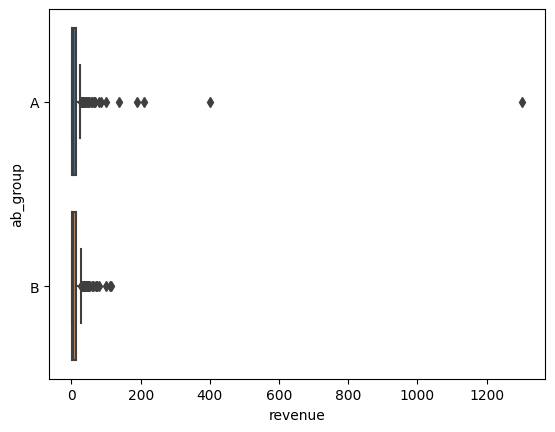

In [8]:
sns.boxplot(data=df.query('revenue > 0'), x='revenue', y='ab_group')
plt.show();

In [9]:
df_A.describe()

,revenue,num_purchases,purchase,av_site visit
count,256.000000,256.000000,256.0,256.000000
mean,18.698469,2.343750,1.0,6.753074
std,87.527589,9.723582,0.0,2.043753
min,0.259689,1.000000,1.0,0.996753
25%,2.318301,1.000000,1.0,5.281247
50%,4.283160,1.000000,1.0,6.871241
75%,11.923141,2.000000,1.0,8.257506
max,1303.609284,152.000000,1.0,12.504262


In [10]:
df_B.describe()

,revenue,num_purchases,purchase,av_site visit
count,234.000000,234.000000,234.0,234.000000
mean,12.362119,1.841880,1.0,6.844776
std,19.007065,2.354021,0.0,3.970112
min,0.259373,1.000000,1.0,-5.646523
25%,2.319883,1.000000,1.0,4.009016
50%,3.980000,1.000000,1.0,7.143956
75%,12.274829,2.000000,1.0,9.776519
max,113.830000,25.000000,1.0,16.955948


In [11]:
df_A_clean = df_A[df_A.revenue < df_A.revenue.quantile(0.975)]
df_A_clean.describe()

,revenue,num_purchases,purchase,av_site visit
count,249.000000,249.000000,249.0,249.000000
mean,9.486302,1.542169,1.0,6.754879
std,13.422091,1.139127,0.0,2.052495
min,0.259689,1.000000,1.0,0.996753
25%,2.303378,1.000000,1.0,5.275766
50%,4.075668,1.000000,1.0,6.880515
75%,10.292411,2.000000,1.0,8.309245
max,79.970000,8.000000,1.0,12.504262


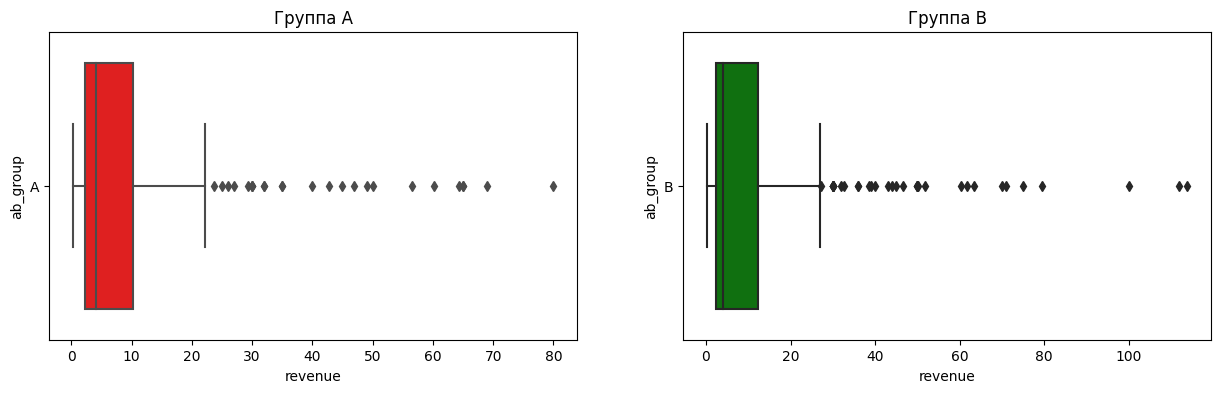

In [13]:
fig, (ax_boxplot, ay_boxplot) = plt.subplots(1, 2, figsize=(15, 4))


ax_boxplot.set_title('Группа А')
ay_boxplot.set_title('Группа B')
sns.boxplot(data=df_A_clean, x='revenue', y='ab_group', color='r', ax=ax_boxplot)
sns.boxplot(data=df_B, x='revenue', y='ab_group', color='g', ax=ay_boxplot);

Рассчитываем среднее значение и медиану

In [14]:
print('ARPPU (среднее значение) :')
print(f"{df_A_clean['revenue'].mean():.4f}\n"
      f"{df_B['revenue'].mean():.4f}")

print('Медиана :')
print(f"{df_A_clean['revenue'].median():.4f}\n"
      f"{df_B['revenue'].median():.4f}")

ARPPU (среднее значение) :
9.4863
12.3621
Медиана :
4.0757
3.9800


Выбросы исключили, получились близкие группы. Смотрим различия

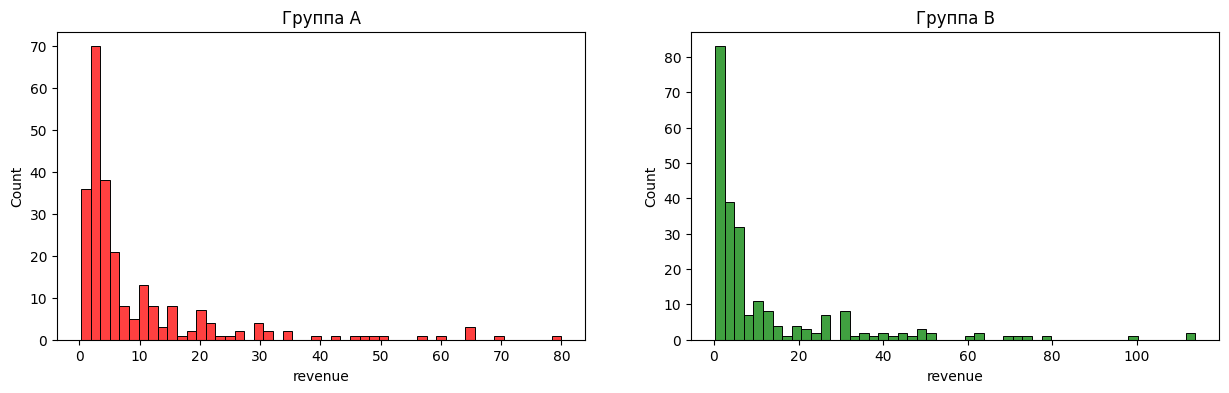

In [15]:
fig, (ax_histplot, ay_histplot) = plt.subplots(1, 2, figsize=(15, 4))

ax_histplot.set_title('Группа A')
ay_histplot.set_title('Группа В')
sns.histplot(df_A_clean['revenue'], bins=50, color='r', ax=ax_histplot)
sns.histplot(df_B['revenue'], bins=50, color='g', ax=ay_histplot);

In [16]:
df_A_clean.shape, df_B.shape

((249, 5), (234, 5))

Используем критерий Манна-Уитни (распределение ненормальное, размер выборки небольшой)

In [17]:
mannwhitneyu(df_A_clean.revenue.values,
             df_B.revenue.values)

MannwhitneyuResult(statistic=28097.5, pvalue=0.49940952593129473)

p-value > 0.05 => нет статистически значимых различий. Нулевую гипотезу не отклоняем



Рассмотрим еще ARPU (показывает, сколько денег в среднем приносит компании один пользователь за определенный промежуток времени).

In [18]:
df_clean = df[df.num_purchases <= 25] # исключим существенные выбросы
df_clean.describe()

,revenue,num_purchases,purchase,av_site visit
count,19917.000000,19917.000000,19917.000000,19917.000000
mean,0.299960,0.042326,0.024502,7.016286
std,3.884460,0.398665,0.154604,3.140652
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.180160
50%,0.000000,0.000000,0.000000,7.006503
75%,0.000000,0.000000,0.000000,8.863318
max,208.303751,25.000000,1.000000,22.446822


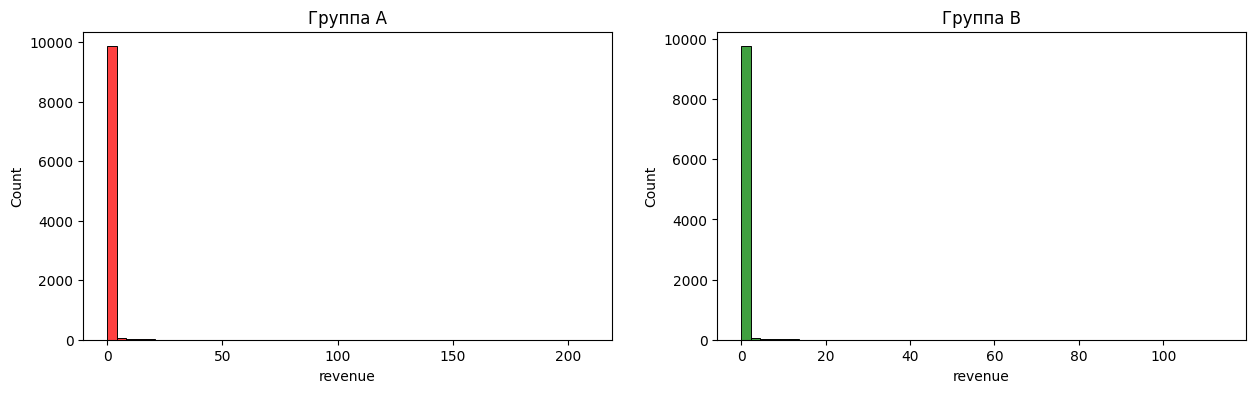

In [20]:
fig, (ax_histplot, ay_histplot) = plt.subplots(1, 2, figsize=(15, 4))

ax_histplot.set_title('Группа A')
ay_histplot.set_title('Группа В')
sns.histplot(df_clean.query('ab_group == "A"')['revenue'], bins=50, color='r', ax=ax_histplot)
sns.histplot(df_clean.query('ab_group == "B"')['revenue'], bins=50, color='g', ax=ay_histplot);

In [21]:
df_clean.query('ab_group == "A"').shape, df_clean.query('ab_group == "B"').shape

((9987, 5), (9930, 5))

 Используем критерий Манна-Уитни и критерий Стьюдента (распределение не нормальное, много наблюдений)

In [23]:
mannwhitneyu(df_clean.query('ab_group == "A"').revenue.values,
             df_clean.query('ab_group == "B"').revenue.values)


MannwhitneyuResult(statistic=49677629.5, pvalue=0.3962510896528323)

In [24]:
ttest_ind(df_clean.query('ab_group == "A"').revenue.values,
             df_clean.query('ab_group == "B"').revenue.values, equal_var = False)


TtestResult(statistic=0.31342797331934313, pvalue=0.7539589469700184, df=19156.011609130666)

pvalue > 0.05 => нет статистически значимых различий.

In [25]:
alpha = 0.05

C_mean = df_clean.query('ab_group == "A"')['revenue'].values.mean()
T_mean = df_clean.query('ab_group == "B"')['revenue'].values.mean()

C_std = df_clean.query('ab_group == "A"')['revenue'].values.std()
T_std = df_clean.query('ab_group == "B"')['revenue'].values.std()

S = np.sqrt((T_std**2 + C_std **2)/ 2)
effect_size =float((T_mean-C_mean)/ S)

n = df_clean.query('ab_group == "A"').shape[0]

analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, power=None, nobs1=n, ratio=1.0, alpha=alpha)
print(f'Мощность теста : {result*100:.2f}%')

Мощность теста : 6.14%


Мощность теста очень низкая и равна 6.14%. Увеличим размер выборки:

In [26]:
power = 0.8
N = analysis.solve_power(effect_size=effect_size, power=power, nobs1=None, ratio=1.0, alpha=alpha)
round(N), round(N/n)

(796036, 80)

Выводы:

Данные по А/В тесту у нас слабые. Данных по метрикам недостаточно, чтобы найти значимые статические различия. Нулевую гипотезц мы не отклоняем, это мы подтвердили вышеописанными расчеами. В иделае, провести тест повторно и увеличеть размеры выборки.


# КЕЙС 3

 Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.
Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.


3.1) За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
результатам подсчета?


3.2) Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите
результаты тестирования, если у нас следующие результаты по количеству конверсии:
1) 25 000
2) 30 000
3) 32 000


1. Используем [калькулятор](https://mindbox.ru/tools/ab-test-calculator/) для расчета размера выборки


---



In [38]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['1234.jpg']))

Saving 1234.jpg to 1234.jpg


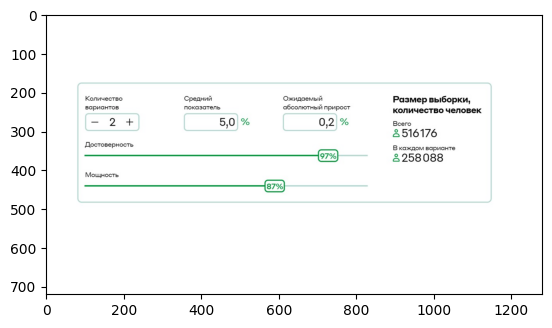

In [39]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [43]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['234.jpg']))

Saving 234.jpg to 234.jpg


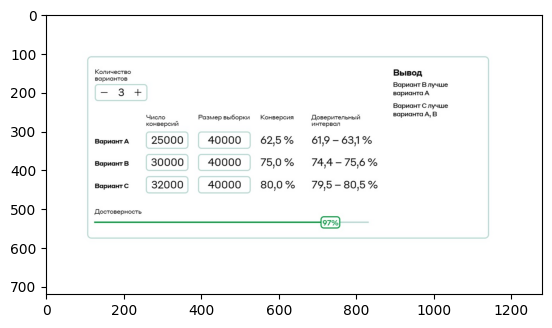

In [44]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [27]:
days = round(516_176 / 40_000)
print(f'Мы можем провести наш тест за {days} месяцев.')

Мы можем провести наш тест за 13 месяцев.


# КЕЙС 4

Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в
каждой группе.

Для проверки нормальности распределения на выборке в 2350 наблюдений применили ,
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.
Какой бы вывод мы могли сделать в данном случае?

В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше

всего подойдёт и почему ?


У нас объем выборки 2350, для Шапиро-Уилка надо, чтоб выборка была не более 2000. Тест будет невалидный и выводы о нормальности я бы делать не стала, будут недостоверные. Я бы использовала тест Колмагорова-Смирнова. Можно так же использовать критерий Стьюдента при нормальном распределении.
.

# КЕЙС 5

Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные. Является ли результат статистически значимым с уровнем
доверия 80%? Какую версию мы выкатим на продакшн?

A) Средняя - 360, отклонение - 40, количество - 9802

B) Средняя - 352, отклонение - 58, количество - 9789


Воспользуемся [калькулятором](https://www.evanmiller.org/ab-testing/t-test.html) для расчета:

In [33]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['345678.jpg']))

Saving 345678.jpg to 345678.jpg


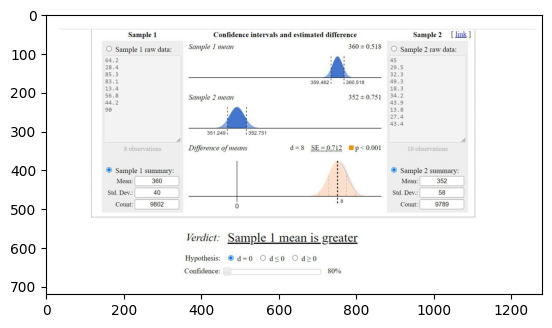

In [36]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

# ВЫВОД:
p-value значительно меньше заданного уровня (p < 0.001). Из графиков видно, что доверительные интервалы не пересекаются => статистически значимые различия есть.
Группу А  => выкатываем в прдакшн.

# КЕЙС 6  

Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.

На схеме необходимо отобразить:
1) Управленческий процесс по договоренностям с внешними партнерами

2) Архитектуру данных с указанием систем, из которых будем скачивать данные

3) Внутрикомандное взаимодействие

1) Управленческий процесс по договоренностям с внешними партнерами:
- Руководитель проекта -старший менеджер общается с внешними партнерами и договаривается с банком для предоставления кэшбэка на подписку первого месяца.
- Младший менеджер - правая рука старшего главного менеджера

2) Архитектура данных:
- CRM для получения данных о клиентах и их активности на платформе.
- Аналитические инструменты для сбора и анализа данных о конверсии в подписку после внедрения кэшбэка (Яндекс Метрика, Google Analytics).
- Базы данных для хранения и обработки данных.

3) Внутрикомандное взаимодействие:
- Проджект менеджер. Человек который руководит всей командой.
- Продуктовый менеджер - целиком отвечает за продукт.
- Менеджер по маркетингу проводит маркетинговые акции, отвечает за рекламную компанию. В его подчинении дизайнеры,верстальщики и контентомейкеры.
- Аналитики. Анализируют и выводят ключевыепоказатели
- Разработчики,тестировщики, тим-лид. Отвечают за разработку и тестирование.